<a href="https://colab.research.google.com/github/rajesh9943/Indian-Automotive-Insights-Unveiling-Trends-through-Data-Analysis/blob/main/Week_6_Indian_Cars_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indian Cars:** Data Analysis and Visualization

In [ ]:


# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Assignment-4/cars_ds_final.csv',index_col=0)

In [ ]:
df

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,18 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,14.3 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


# **1. Understand Dataset:**
Get a sense of the dataset structure, including the number of rows and columns.


In [ ]:
df

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,18 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,14.3 km/litre,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1276, 140)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


In [ ]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [ ]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [ ]:
df.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

# **2. Data Cleaning:**
Handle missing values, if any, by either removing or imputing them based on the nature of the data.

In [ ]:
df=df.rename(columns={'Make':'Manufacturer','Ex-Showroom_Price':'Price'})

In [ ]:
df['car'] = df.Manufacturer + ' ' + df.Model
c = ['Manufacturer','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']

In [ ]:
df

,Manufacturer,Model,Variant,Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,car
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tata Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Yes,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,40 litres,Diesel,1495 mm,4440 mm,1695 mm,Sedan,4.0,22.6 km/litre,...,Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,18 km/litre,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,14.3 km/litre,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Honda City


In [ ]:
#df['Price'] = df['Price'].str.replace('Rs. ','',regex=False)
#df['Price'] = df['Price'].str.replace(',','',regex=False)
#df['Price'] = df['Price'].astype(int)

In [ ]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('Rs. ','')

In [ ]:
df['Price'].dtype

dtype('O')

In [ ]:
df['Price'] = df['Price'].astype(int)

In [ ]:
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Manufacturer.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]

In [ ]:
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)


In [ ]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)

In [ ]:
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))

In [ ]:
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)

In [ ]:
# change the all columns name First letter into Upper case

df.columns = df.columns.str.capitalize()


In [ ]:
df=df.rename(columns={'Arai_certified_mileage':'Mileage'})

In [ ]:
df

,Manufacturer,Model,Car,Variant,Body_type,Fuel_type,Fuel_system,Type,Drivetrain,Price,Displacement,Cylinders,Mileage,Power,Torque,Fuel_tank_capacity,Height,Length,Width,Doors,Seating_capacity,Wheelbase,Number_of_airbags
0,Tata,Nano Genx,Tata Nano Genx,Xt,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),292667,624,2,23.60,37.48,51Nm@4000rpm,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0
1,Tata,Nano Genx,Tata Nano Genx,Xe,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),236447,624,2,23.60,37.48,51Nm@4000rpm,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0
3,Tata,Nano Genx,Tata Nano Genx,Xta,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),334768,624,2,21.90,37.48,51Nm@4000rpm,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0
4,Tata,Nano Genx,Tata Nano Genx,Xm,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),272223,624,2,23.60,37.48,51Nm@4000rpm,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0
5,Tata,Nano Genx,Tata Nano Genx,Xma,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),314815,624,2,21.90,37.48,51Nm@4000rpm,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Honda City,Vx Mt Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1302000,1498,4,25.10,98.63,200Nm@1750rpm,40.0,1495.0,4440.0,1695.0,4,5,2600.0,2
1272,Honda,City,Honda City,Zx Mt Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1421000,1498,4,25.10,98.63,200Nm@1750rpm,40.0,1495.0,4440.0,1695.0,4,5,2600.0,6
1273,Honda,City,Honda City,Zx Cvt Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1431000,1497,4,22.60,117.37,145Nm@4600rpm,40.0,1495.0,4440.0,1695.0,4,5,2600.0,6
1274,Honda,City,Honda City,V Cvt Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1201000,1497,4,17.80,117.37,145Nm@4600rpm,40.0,1495.0,4440.0,1695.0,4,5,2600.0,2


In [ ]:
df.shape

(987, 23)

# **3. Data Types:**
Check the data types of each column. Ensure they are appropriate for the analysis.

In [ ]:
df.dtypes

Manufacturer           object
Model                  object
Car                    object
Variant                object
Body_type              object
Fuel_type              object
Fuel_system            object
Type                   object
Drivetrain             object
Price                   int64
Displacement            int64
Cylinders               int64
Mileage               float64
Power                 float64
Torque                 object
Fuel_tank_capacity    float64
Height                float64
Length                float64
Width                 float64
Doors                   int64
Seating_capacity        int64
Wheelbase             float64
Number_of_airbags       int64
dtype: object

#**4. Descriptive Statistics:**
Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns.

In [ ]:
df.describe().drop('Price',axis=1)

,Displacement,Cylinders,Mileage,Power,Fuel_tank_capacity,Height,Length,Width,Doors,Seating_capacity,Wheelbase,Number_of_airbags
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,1759.184397,4.220871,18.515380,141.617224,50.920871,1583.807340,4252.248875,1775.582416,4.570415,5.266464,2606.583587,3.175279
std,924.993708,1.380041,4.588321,116.238232,15.318039,152.821356,447.163835,144.234947,0.714850,1.085082,180.699575,2.500847
min,624.000000,2.000000,3.400000,33.530000,24.000000,1.845000,4.640000,1.845000,2.000000,2.000000,1840.000000,0.000000
25%,1198.000000,4.000000,16.000000,81.860000,40.000000,1495.000000,3985.000000,1695.000000,4.000000,5.000000,2470.000000,2.000000
50%,1496.000000,4.000000,18.490000,102.580000,45.000000,1549.000000,4315.000000,1745.000000,5.000000,5.000000,2590.000000,2.000000
75%,1988.000000,4.000000,21.700000,152.880000,60.000000,1655.000000,4568.000000,1832.000000,5.000000,5.000000,2700.000000,6.000000
max,6752.000000,12.000000,28.400000,778.210000,105.000000,2055.000000,5575.000000,2226.000000,5.000000,9.000000,3266.000000,14.000000


# **5. Histograms:**
Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).

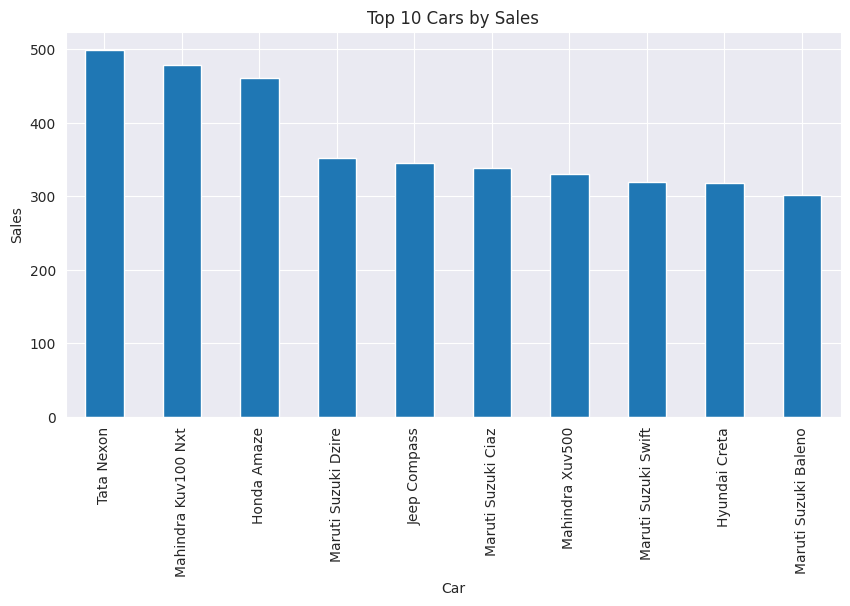

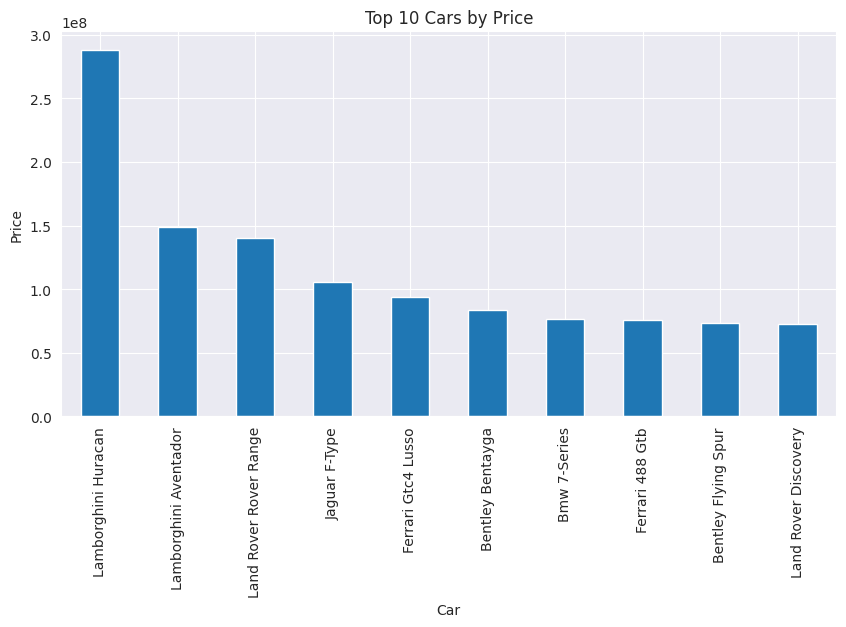

In [ ]:
# Create a top 10 cars histogram chat for sales and price

# Top 10 Cars by Sales
top_10_sales = df.groupby('Car')['Mileage'].sum().sort_values(ascending=False).head(10)
top_10_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Cars by Sales')
plt.xlabel('Car')
plt.ylabel('Sales')
plt.show()

# Top 10 Cars by Price
top_10_price = df.groupby('Car')['Price'].sum().sort_values(ascending=False).head(10)
top_10_price.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Cars by Price')
plt.xlabel('Car')
plt.ylabel('Price')
plt.show()


# **6. Bar Charts:**
Plot bar charts to represent the count of categorical variables (e.g., car models, manufacturers).


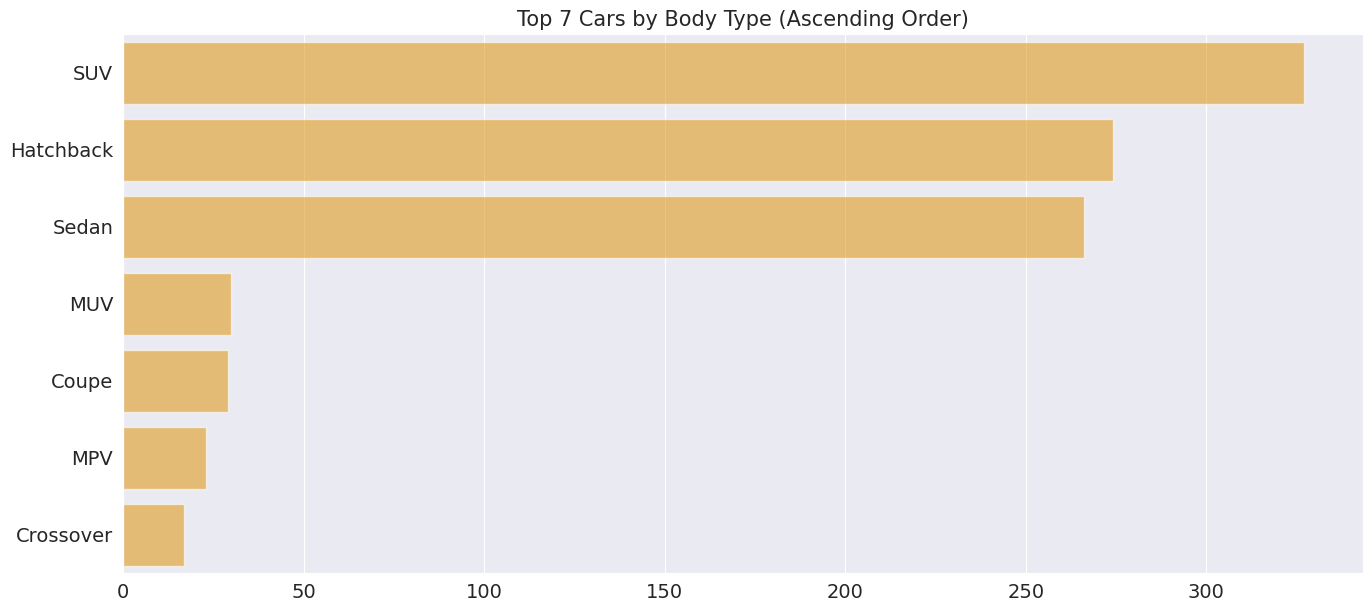

In [ ]:

plt.figure(figsize=(16, 7))

# Count the occurrences of each body type
body_type_counts = df['Body_type'].value_counts()

# Select the top 7 body types
top_body_types = body_type_counts.nlargest(7).index

# Create a count plot using the selected body types, sorted in ascending order
sns.countplot(data=df, y='Body_type', order=top_body_types, alpha=0.6, color='orange')

plt.title('Top 7 Cars by Body Type (Ascending Order)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()


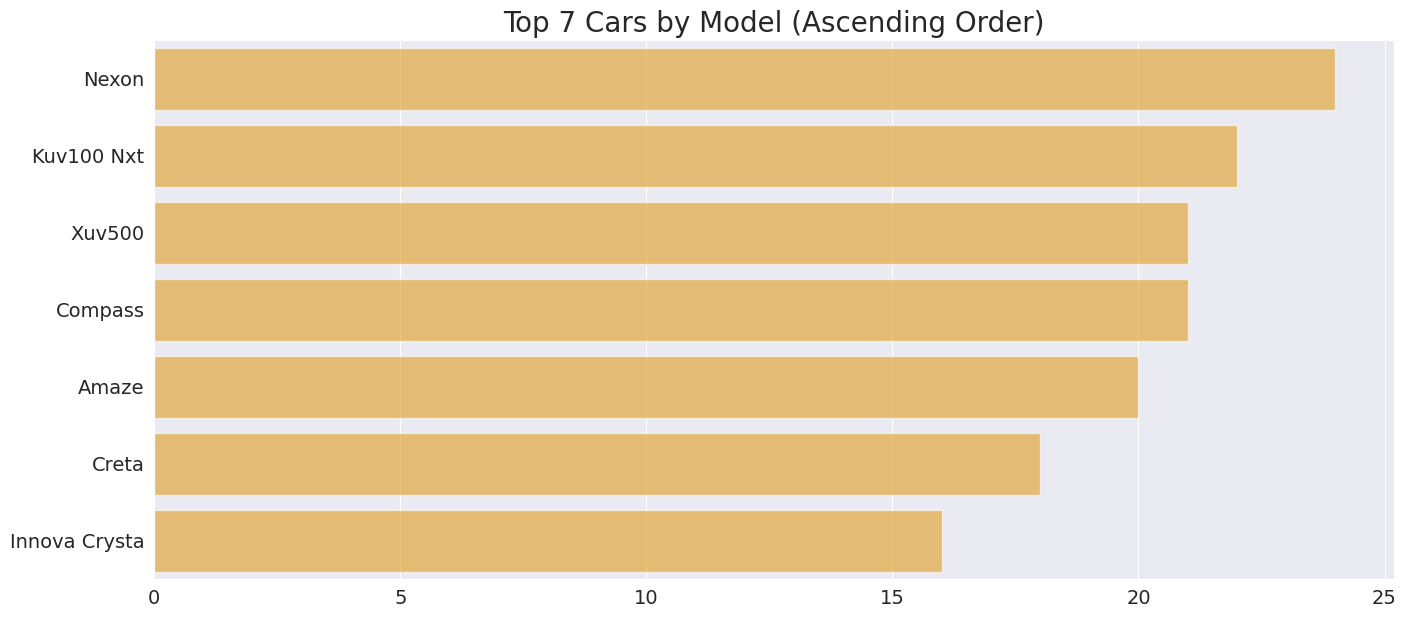

In [ ]:
#Create a bar chart using companies and model

plt.figure(figsize=(16, 7))

# Count the occurrences of each model
model_counts = df['Model'].value_counts()

# Select the top 7 models
top_models = model_counts.nlargest(7).index

# Create a count plot using the selected models, sorted in ascending order
sns.countplot(data=df, y='Model', order=top_models, alpha=0.6, color='orange')

plt.title('Top 7 Cars by Model (Ascending Order)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()


# **7. Box Plots:**
Use box plots to identify outliers and understand the distribution of numeric variables.


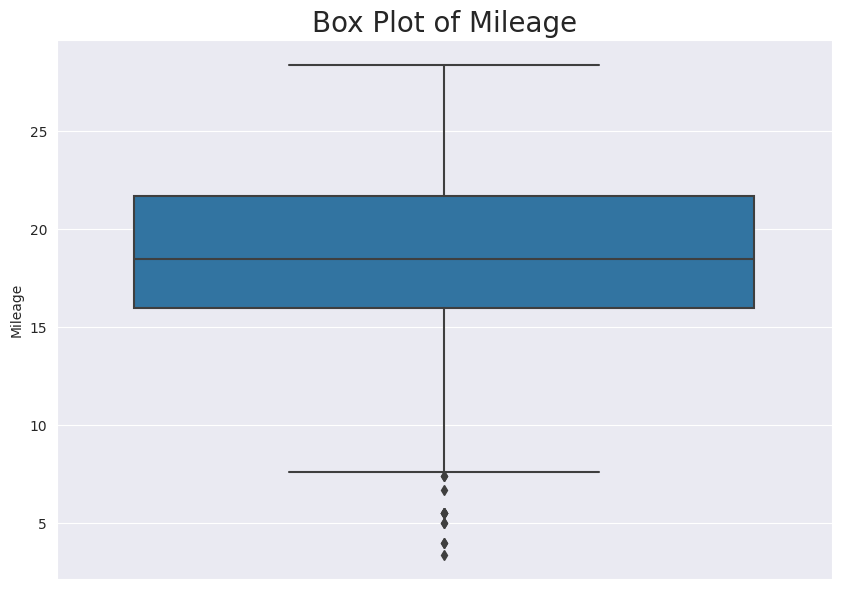

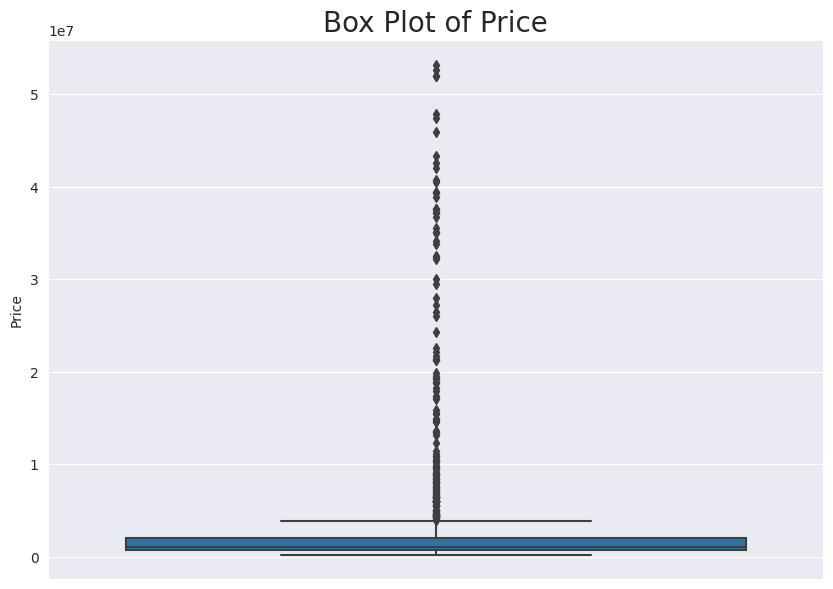

In [ ]:
# Box Plots: Use box plots to identify outliers and understand the distribution of numeric variables.

plt.figure(figsize=(10, 7))

# Create a box plot of the mileage column
sns.boxplot(data=df, y='Mileage')

plt.title('Box Plot of Mileage', fontsize=20)
plt.xlabel('')
plt.ylabel('Mileage')
plt.show()

plt.figure(figsize=(10, 7))

# Create a box plot of the price column
sns.boxplot(data=df, y='Price')

plt.title('Box Plot of Price', fontsize=20)
plt.xlabel('')
plt.ylabel('Price')
plt.show()


# **8. Pie Charts:**
Represent the contribution of different car models or manufacturers using pie charts.

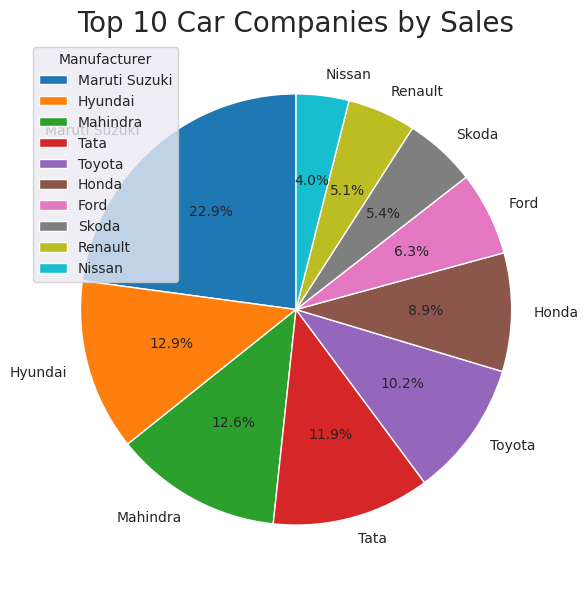

In [ ]:
# Create a pie chart top 10 car for companies

plt.figure(figsize=(10, 7))

# Get the top 10 companies by sales
top_10_companies = df.groupby('Manufacturer')['Mileage'].sum().sort_values(ascending=False).head(10)

# Create a pie chart using the top 10 companies, sorted in descending order
plt.pie(top_10_companies, labels=top_10_companies.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 Car Companies by Sales', fontsize=20)
plt.legend(title='Manufacturer', loc='upper left')
plt.show()


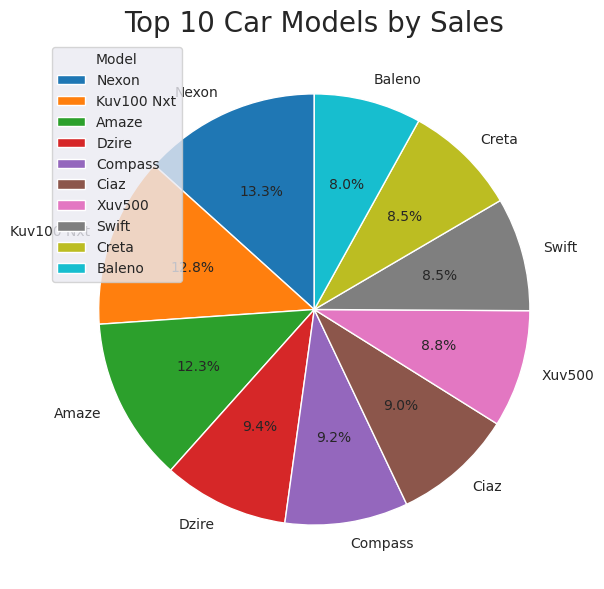

In [ ]:
# Create a pie chart top 10 car models

plt.figure(figsize=(10, 7))

# Get the top 10 models by sales
top_10_models = df.groupby('Model')['Mileage'].sum().sort_values(ascending=False).head(10)

# Create a pie chart using the top 10 models, sorted in descending order
plt.pie(top_10_models, labels=top_10_models.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 Car Models by Sales', fontsize=20)
plt.legend(title='Model', loc='upper left')
plt.show()


# **9. Count Plots:**
Visualize the count of observations for categorical variables using count plots.


<Axes: ylabel='Frequency'>

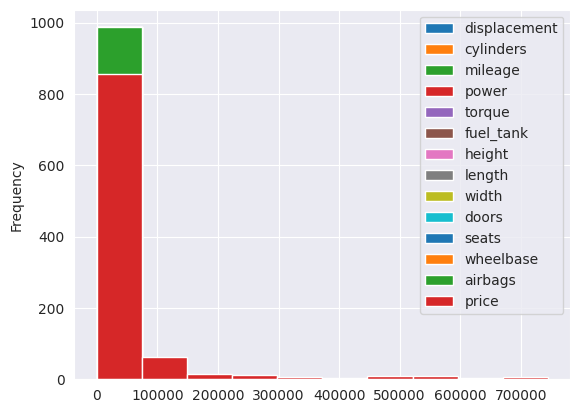

In [ ]:
# Using dataframe df: Count Plots: Visualize the count of observations for categorical variables using count plots.

df.plot.hist()


# **Bivariate Analysis:**

# **1. Correlation Matrix:**
Create a correlation matrix to understand the relationships between numeric variables.


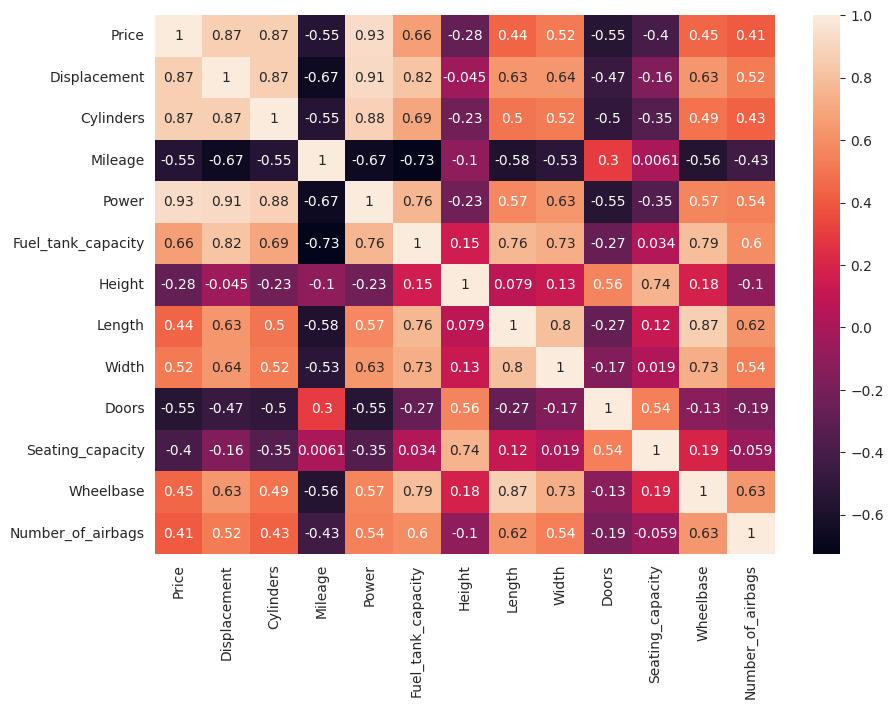

In [ ]:
# Correlation Matrix: Create a correlation matrix to understand the relationships between numeric variables.

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()


# **2. Scatter Plots:**
Plot scatter plots to explore the relationship between two numeric variables (e.g., sales vs. price).

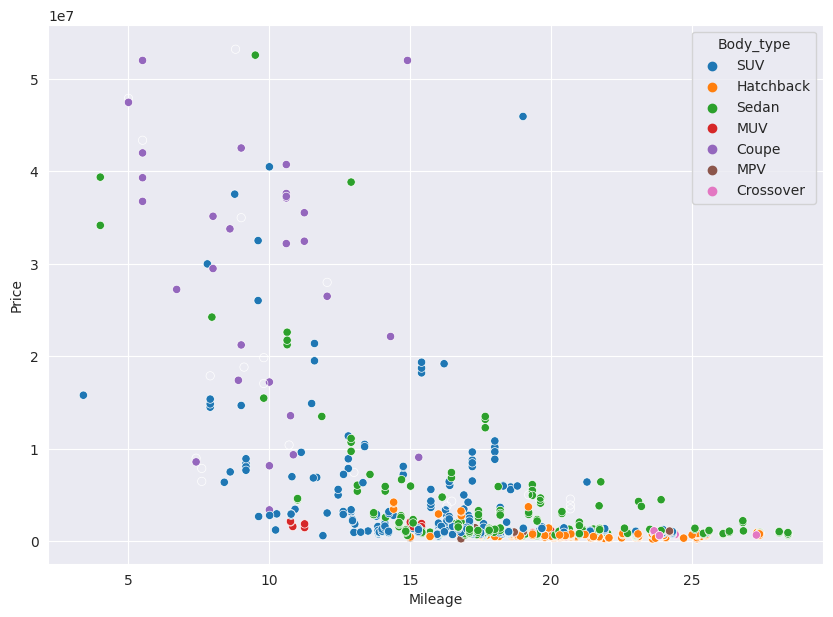

In [ ]:
# Create a Plot scatter plots for top 7 body type to explore the relationship between two numeric variables

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Body_type', hue_order=top_body_types, ax=ax)
plt.show()


# **4.Pair Plots:**
Use pair plots for a quick overview of relationships between multiple numeric variables.


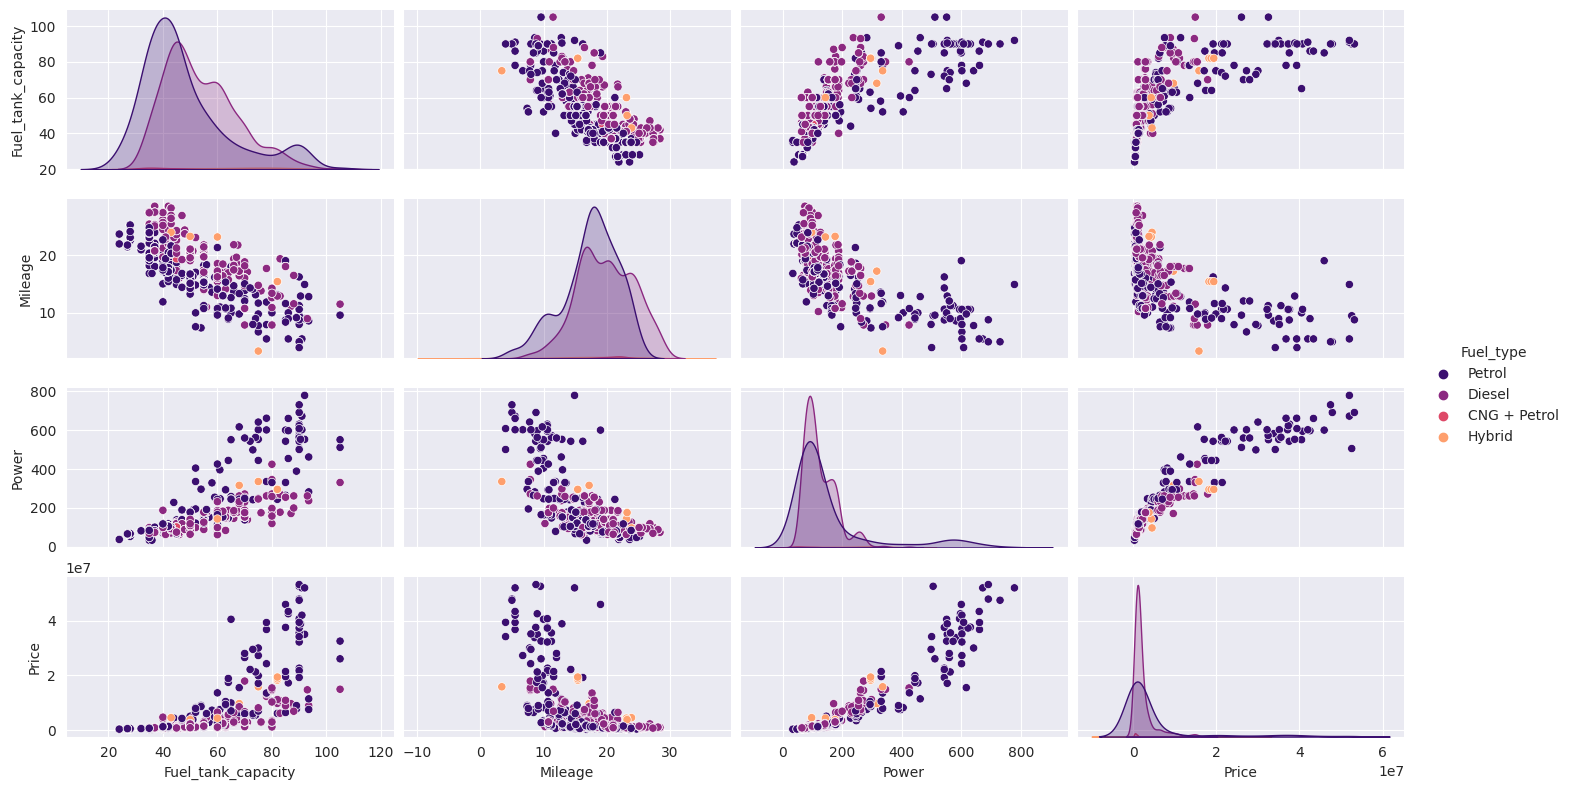

In [ ]:
# Pair Plots: Use pair plots for a quick overview of relationships between multiple numeric variables.

sns.pairplot(df,vars=[ 'Fuel_tank_capacity', 'Mileage', 'Power', 'Price'], hue= 'Fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);


# **5. Heatmaps:**
Utilize heatmaps to visually represent the correlation matrix for better insights.


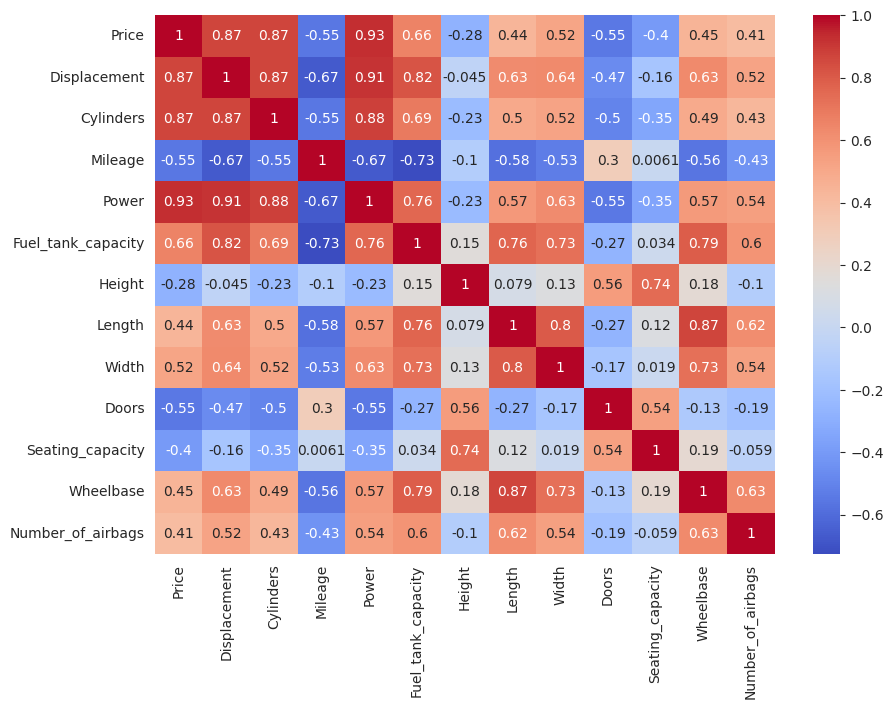

In [ ]:
# Heatmaps: Utilize heatmaps to visually represent the correlation matrix for better insights.

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()


# **6. Joint Plots:**
Use joint plots to display the distribution of two numeric variables and their relationship.


<Figure size 1000x700 with 0 Axes>

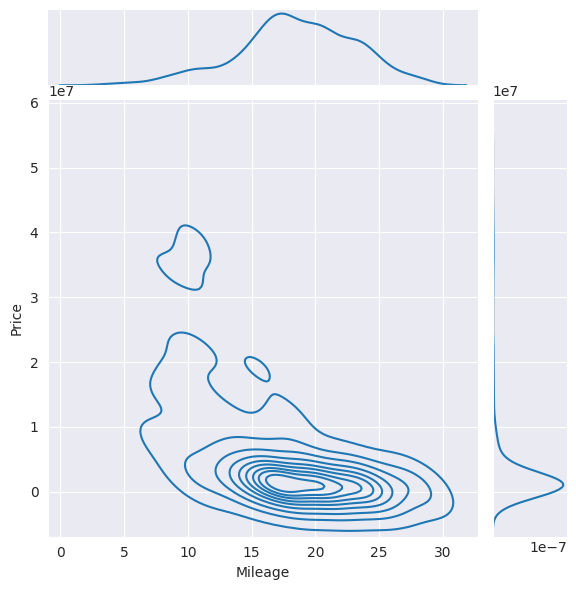

In [ ]:
# Joint Plots: Use joint plots to display the distribution of two numeric variables and their relationship.

plt.figure(figsize=(10, 7))
sns.jointplot(data=df, x='Mileage', y='Price', kind='kde')
plt.show()


# **7. Box Plots with Hue:**
Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.


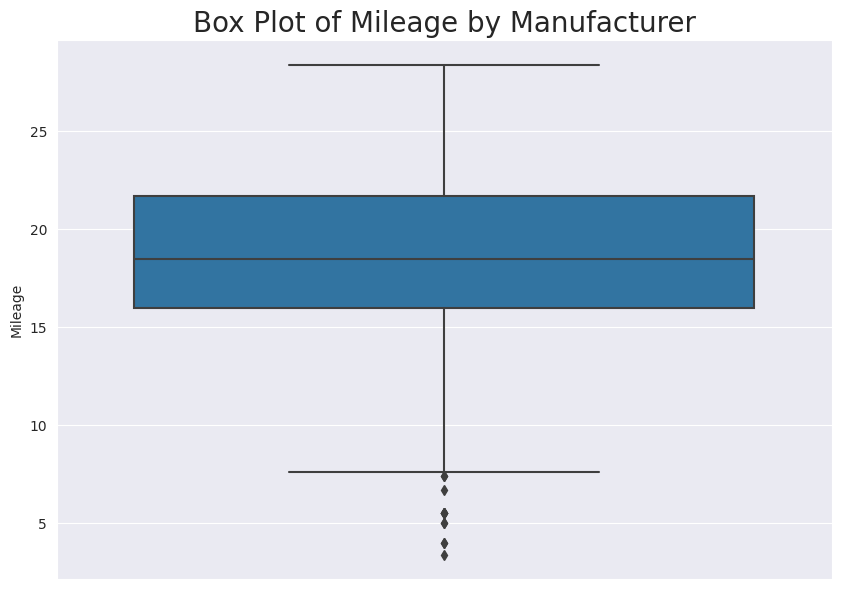

In [ ]:
# box Plots with Hue: Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.

plt.figure(figsize=(10, 7))

# Create a box plot of the mileage column, with the 'Manufacturer' column as the hue
sns.boxplot(data=df, y='Mileage', hue='Manufacturer')

plt.title('Box Plot of Mileage by Manufacturer', fontsize=20)
plt.xlabel('')
plt.ylabel('Mileage')
plt.show()


# **8. Categorical Plots:**
Explore relationships between categorical and numeric variables using categorical plots.


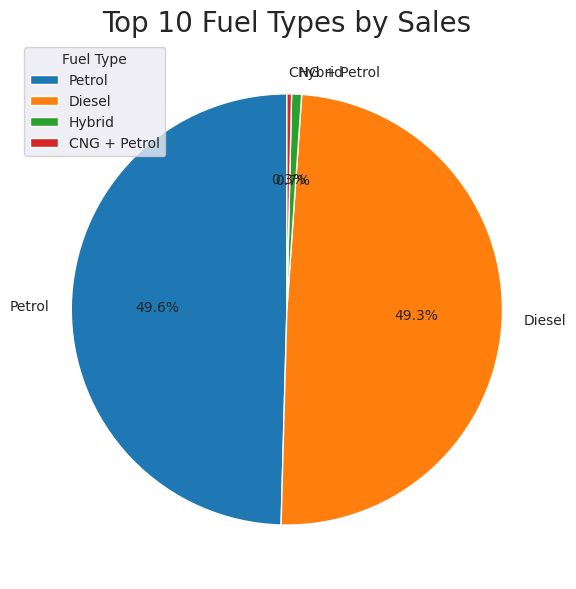

In [ ]:
# Create a pie chart for fuel type

plt.figure(figsize=(10, 7))

# Get the top 10 companies by sales
top_10_fuel_types = df.groupby('Fuel_type')['Mileage'].sum().sort_values(ascending=False).head(10)

# Create a pie chart using the top 10 companies, sorted in descending order
plt.pie(top_10_fuel_types, labels=top_10_fuel_types.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 Fuel Types by Sales', fontsize=20)
plt.legend(title='Fuel Type', loc='upper left')
plt.show()


# **9. Violin Plots:**
Visualize the distribution of numeric variables across different categories using violin plots.


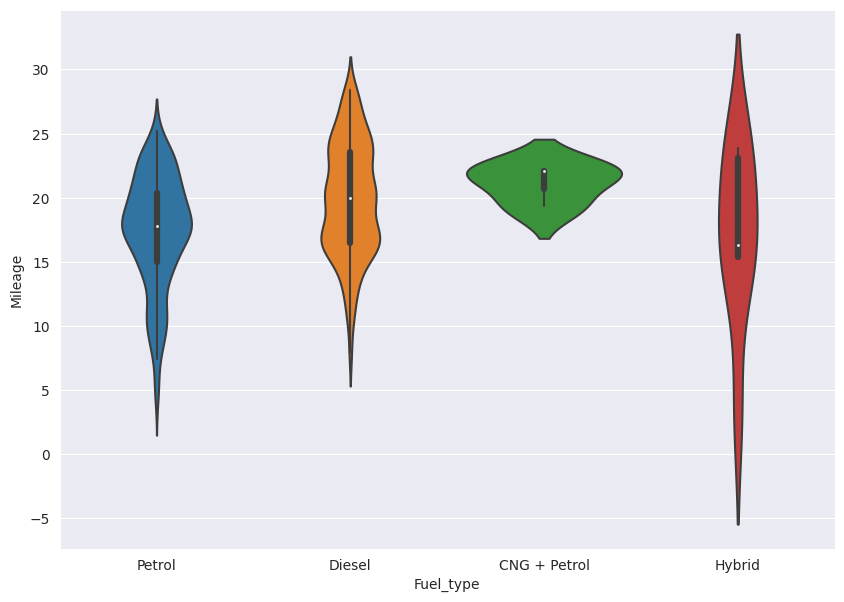

In [ ]:
# Create a violin chart

plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='Fuel_type', y='Mileage')
plt.show()


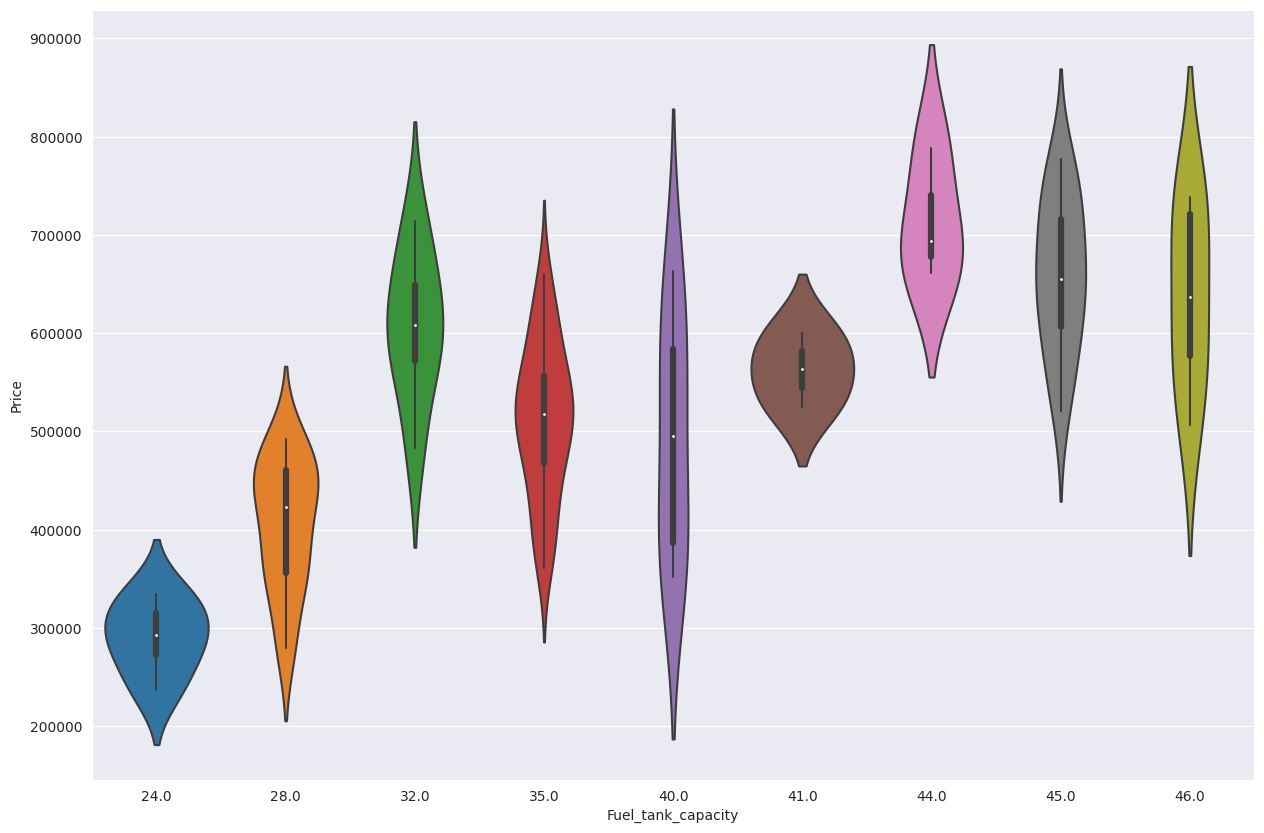

In [ ]:

plt.figure(figsize=(15,10))
sns.violinplot(x='Fuel_tank_capacity', y='Price', data=df.head(100))
plt.show()


# **10. Stacked Bar Charts:**
Represent the combined contribution of different categories using stacked bar charts.


<Axes: xlabel='Model'>

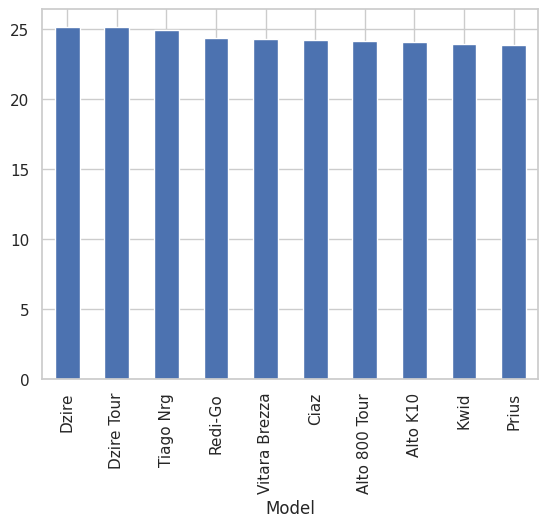

In [ ]:
#Using dataframe df: create a Stacked Bar Charts To represent top ten car model and its mileage

df.groupby('Model')['Mileage'].mean().nlargest(10).plot(kind='bar', stacked=True)


# **11. Insights and Documentation:**
Document key findings and insights obtained from both univariate and bivariate analyses. Use graphs and visualizations to support observations.


### 1. Dataset Overview:
- The dataset contains 1276 entries and 140 columns.
- The data types include float64 for numeric columns and object for categorical columns.

### 2. Data Cleaning:
- Renamed columns and created a new 'car' column by combining 'Manufacturer' and 'Model'.
- Cleaned and converted 'Price' to integer.
- Selected relevant columns and removed rows with missing values in certain columns.
- Cleaned and converted columns like 'Height', 'Length', 'Width', 'Wheelbase', 'Fuel_Tank_Capacity', and 'Displacement' to numeric types.
- Standardized and cleaned 'ARAI_Certified_Mileage' column.
- Extracted numerical values from 'Power' and 'Torque' columns and converted them to appropriate data types.
- Capitalized column names and renamed 'Arai_certified_mileage' to 'Mileage'.

### 3. Data Types:
- Checked and confirmed appropriate data types for analysis.

### 4. Descriptive Statistics:
- Created a bar chart representing the count of observations, makers, models, and features in the dataset.

### 5. Histograms:
- Plotted histograms for the top 10 cars based on sales and price.

### 6. Bar Charts:
- Visualized the count of observations for the top 7 cars based on body type and model.

### 7. Box Plots:
- Used box plots to identify outliers and understand the distribution of mileage and price.

### 8. Pie Charts:
- Represented the contribution of the top 10 car companies and models using pie charts.

### 9. Count Plots:
- Visualized the count of observations for all variables.

### 10. Bivariate Analysis:
- Created a correlation matrix to understand relationships between numeric variables.
- Plotted scatter plots, pair plots, heatmaps, joint plots, box plots with hue, categorical plots, violin plots, and stacked bar charts to explore relationships and distributions.

### 11. Insights and Documentation:
- Documented key findings and insights obtained from both univariate and bivariate analyses.

Overall, the analysis provides a comprehensive understanding of the dataset, its structure, and relationships between variables. The visualizations enhance the interpretation of the data and help in deriving meaningful insights.